In [1]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import pathlib
from sklearn.model_selection import train_test_split

2023-05-15 23:36:00.084103: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-15 23:36:00.107824: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 23:36:00.233888: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 23:36:00.234752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 23:36:01.074144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
#convert the path to a path on the device
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
#to get the daisy images only
daisy = list(data_dir.glob('daisy/*'))
daisy[0:5]

[PosixPath('datasets/flower_photos/daisy/5135131051_102d4878ca_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5876455546_32049e5585.jpg'),
 PosixPath('datasets/flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg')]

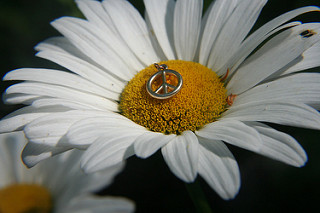

In [6]:
#PIL or pillow is similar to cv2 to display images
PIL.Image.open(str(daisy[2]))

In [7]:
flower_img_dict =  {
    'roses' : list(data_dir.glob('roses/*')), 
    'daisy' : list(data_dir.glob('daisy/*')), 
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [8]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [9]:
flower_img_dict['daisy'][:5]

[PosixPath('datasets/flower_photos/daisy/5135131051_102d4878ca_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5876455546_32049e5585.jpg'),
 PosixPath('datasets/flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg')]

In [10]:
#we have to convert the path to a str as opencv only accepts strings
img = cv2.imread(str(flower_img_dict['daisy'][2]))
img.shape

(213, 320, 3)

In [11]:
cv2.resize(img, (180, 100)).shape

(100, 180, 3)

In [12]:
#we will now just append all the resized images into a new array
x = []
y = []
for flower_name, images in flower_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180, 180))
        x.append(resized_image)
        y.append(flower_labels_dict[flower_name])

In [13]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
x = np.array(x)
y = np.array(y)


In [15]:
#create standard train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
y_train[:10]

array([2, 0, 1, 2, 4, 0, 0, 3, 3, 4])

In [16]:
type(y_train)



numpy.ndarray

In [17]:
#we have to scale the values of x_train so that its easier for the model to train
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
print(y_train)

[2 0 1 ... 2 3 3]


In [18]:
#creation of the neural network without data augmentation
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
num_classes = 5

model = Sequential([
  layers.Conv2D(10, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(20, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10) 

2023-05-15 23:36:11.718726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 23:36:11.719513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
86/86 [==============================] - 16s 181ms/step - loss: 1.3137 - accuracy: 0.4186
Epoch 2/10
86/86 [==============================] - 16s 180ms/step - loss: 1.0334 - accuracy: 0.5876
Epoch 3/10
86/86 [==============================] - 16s 184ms/step - loss: 0.8791 - accuracy: 0.6533
Epoch 4/10
86/86 [==============================] - 30s 349ms/step - loss: 0.7197 - accuracy: 0.7278
Epoch 5/10
86/86 [==============================] - 32s 366ms/step - loss: 0.5692 - accuracy: 0.7812
Epoch 6/10
86/86 [==============================] - 31s 363ms/step - loss: 0.3907 - accuracy: 0.8601
Epoch 7/10
86/86 [==============================] - 26s 306ms/step - loss: 0.2246 - accuracy: 0.9230
Epoch 8/10
86/86 [==============================] - 28s 326ms/step - loss: 0.1445 - accuracy: 0.9568
Epoch 9/10
86/86 [==============================] - 29s 336ms/step - loss: 0.1264 - accuracy: 0.9648
Epoch 10/10
86/86 [==============================] - 27s 317ms/step - loss: 0.0923 - accura

In [19]:
#as we can see the training set has good accuracy while the testing set has bad this is because of overfitting
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 3s 105ms/step - loss: 1.9378 - accuracy: 0.6318


[1.9378163814544678, 0.6318082809448242]

In [23]:
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

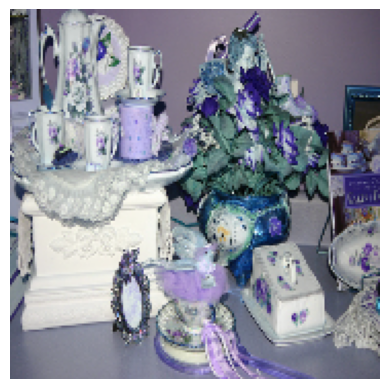

In [24]:
plt.axis('off')
plt.imshow(x[0])

In [25]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
num_classes = 5

model = Sequential([
  data_aug,
  layers.Conv2D(10, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(20, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(30, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 22s 240ms/step - loss: 1.3814 - accuracy: 0.4179
Epoch 2/10
86/86 [==============================] - 19s 222ms/step - loss: 1.1344 - accuracy: 0.5414
Epoch 3/10
86/86 [==============================] - 19s 222ms/step - loss: 1.0411 - accuracy: 0.5894
Epoch 4/10
86/86 [==============================] - 19s 224ms/step - loss: 0.9180 - accuracy: 0.6439
Epoch 5/10
86/86 [==============================] - 19s 225ms/step - loss: 0.8743 - accuracy: 0.6581
Epoch 6/10
86/86 [==============================] - 19s 224ms/step - loss: 0.8105 - accuracy: 0.6988
Epoch 7/10
86/86 [==============================] - 19s 224ms/step - loss: 0.8204 - accuracy: 0.6922
Epoch 8/10
86/86 [==============================] - 21s 245ms/step - loss: 0.7541 - accuracy: 0.7100
Epoch 9/10
86/86 [==============================] - 23s 265ms/step - loss: 0.7344 - accuracy: 0.7155
Epoch 10/10
86/86 [==============================] - 28s 328ms/step - loss: 0.6958 - accura

In [26]:
#as you can see y test is more accurate
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 3s 87ms/step - loss: 0.7573 - accuracy: 0.7081


[0.7573308944702148, 0.7080609798431396]